## Re-slicing

In [1]:
import sys
sys.path.append("/Users/jingyiwu/Desktop/SUITPy-Jingyi_reslice/SUITPy")
import reslice
from nilearn import plotting
import nibabel as nib
from numpy import *
import scipy.io as sio
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Load files and Make Meshgrid

In [2]:
img = nib.load('anatomical_sess-01.nii')
mask = nib.load('c_anatomical_sess-01_pcereb.nii')
flowfield = nib.load('u_a_anatomical_sess-01_seg1.nii')
affineTr = sio.loadmat('Affine_anatomical_sess-01_seg1.mat').get('Affine')
deformation_img = nib.load("y_suitdef.nii")

In [3]:
xm_data, ym_data, zm_data = reslice.mesh_data(affineTr,img,flowfield)
xm_mask, ym_mask, zm_mask = reslice.mesh_data(affineTr, mask, flowfield)

In [4]:
data = np.zeros((flowfield.shape[0], flowfield.shape[1], flowfield.shape[2]))
maskData = np.zeros((flowfield.shape[0], flowfield.shape[1], flowfield.shape[2]))
data_near = np.zeros((flowfield.shape[0], flowfield.shape[1], flowfield.shape[2]))
maskData_near = np.zeros((flowfield.shape[0], flowfield.shape[1], flowfield.shape[2]))

### Sample image with trilinear interpolation

In [5]:
data = reslice.sample_image(img, xm_data, ym_data, zm_data, 'trilinear').reshape((flowfield.shape[0], flowfield.shape[1], flowfield.shape[2]))
maskData = reslice.sample_image(mask, xm_mask, ym_mask, zm_mask, 'trilinear').reshape((flowfield.shape[0], flowfield.shape[1], flowfield.shape[2]))
masked = np.multiply(data,maskData)

In [6]:
masked_img = reslice.create_img(masked, flowfield.affine, False)

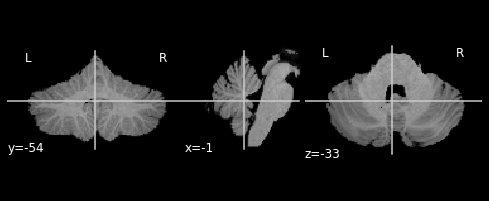

In [7]:
plotting.plot_anat(masked_img, cut_coords=[-1,-54, -33])

### Non-linear deformation

In [8]:
after_def_img = reslice.non_linear_deformation(deformation_img, masked_img, affineTr)

In [9]:
after_def_img = reslice.create_img(after_def_img, deformation_img.affine, False)

In [10]:
after_def_img.affine

array([[  -1.,    0.,    0.,   70.],
       [   0.,    1.,    0., -100.],
       [   0.,    0.,    1.,  -75.],
       [   0.,    0.,    0.,    1.]])

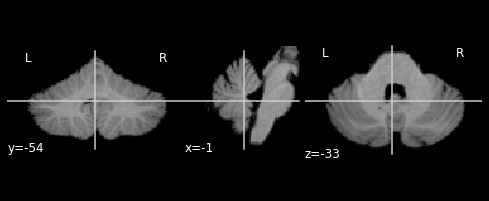

In [11]:
plotting.plot_anat(after_def_img, cut_coords=[-1,-54, -33])

### RAS to LPI

In [12]:
lpi_img, vff = reslice.img_in_LPI(after_def_img, flowfield)

In [13]:
output_img = reslice.create_img(lpi_img, vff, True)

In [14]:
output_img.affine

array([[   1.,    0.,    0.,  -70.],
       [   0.,    1.,    0., -100.],
       [   0.,    0.,    1.,  -75.],
       [   0.,    0.,    0.,    1.]])

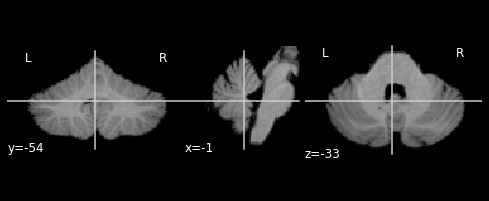

In [15]:
plotting.plot_anat(output_img, cut_coords=[-1,-54, -33])